# ECE1513 practical session 8

### Learning outcomes:
    1. Linear Regression
    2. Logistic Regression
    3. Gradient Descent

###Linear Regression

Let $x$ be the independent variable and $y$ be the dependent variable. In linear regression, we will define a linear relationship between these two variables as $y = wX + b$. The vectorized form is written as $y = Xw$, where $y$ and $w$ are vectors while $X$ is a matrix.

The linear regression model can be represented by equation $y= b + w_1x_1 + w_2x_2 + ......+w_nx_n$.

Bias term can further be incorporated into the equation as an additional weight with cofficient 1, so $y= w_0(1) + w_1x_1 + w_2x_2 + ......+w_nx_n$, where $w_0 = b$.



The loss function for linear regression would be sum of squares, $L(y,t)=\frac{1}{2}\ (y-t)^2$, where $t$ is the target value and $y$ is the predicted value Now for the simplest case of a straight line, lets substitute the value of $y$ from $y = wx + b$ and compute the average for $N$ examples:

$J=\frac{1}{2N}[\sum_{i=1}^N((wx^{(i)}+b)-t^{(i)})^2]$

Partial Derivative of the equation with respect to $w$ is:

$\frac{{\partial J}}{\partial w}=\frac{1}{2N}[\sum_{i=0}^N2~x^{(i)}~((wx^{(i)}+b)-t^{(i)})]$

And wrt $b$ is:

$\frac{\partial J}{\partial b}=\frac{1}{N}[\sum_{i=0}^N(y^{(i)}-t^{(i)})]$


To make computations more efficient, especially with large datasets, vectorized representation of the cost function is used and then $\frac{{\partial J}}{\partial w}$ is $\frac{1}{N}[X^T(Xw-t)]$.

The goal is to find the optimal weights  𝑤  that minimize the cost function  𝐽(𝑤) , to do that, we take the derivative of  𝐽(𝑤)  with respect to  𝑤 , set it to 0, then solve for w:

$[X^T(Xw-t)] = 0$  → $w = (X^T X)^{-1} X^T t$

$w$ is the optimal weights that minimize the mean squared error cost function.






*Linear Regression - Direct Solution*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import torch
from torch import nn
import math
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
n = 60 # number of points
w = 2 # slope
b = 4 # intercept
r = 2 # range of data

np.random.seed(100)
x = r*np.random.rand(n) # random samples from a uniform distribution over [0, 2)
x_part1 = x # for later

x.sort()
y_perfect = w*x + b # no noise
y = w*x + b + 0.3 * np.random.randn(n) # real data

In [3]:
print(x[0:5])

[0.00943771 0.01137701 0.03050994 0.04087826 0.07295211]


In [4]:
print(y_perfect[0:5])

[4.01887542 4.02275403 4.06101988 4.08175653 4.14590423]


In [5]:
print(y[0:5])

[4.40879985 3.50282534 3.76602686 4.18900885 3.66183068]


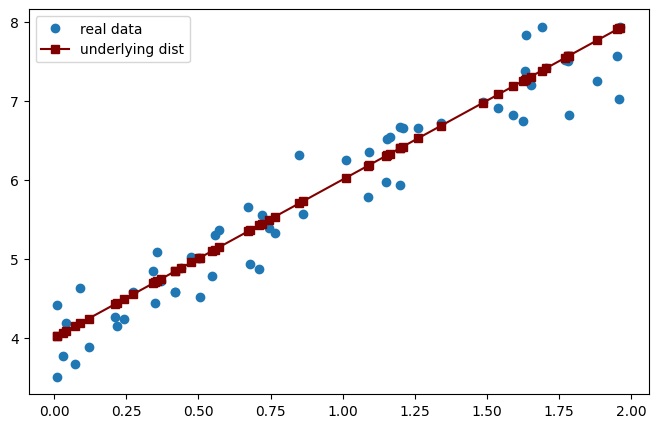

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='real data')
plt.plot(x, y_perfect, 's-', color = 'maroon', label='underlying dist')
plt.legend()
plt.show()

In [7]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [8]:
print(x[0:5])

[[1.         0.00943771]
 [1.         0.01137701]
 [1.         0.03050994]
 [1.         0.04087826]
 [1.         0.07295211]]


In [9]:
W = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y)) # direct solution
y_predict = np.dot(x, W) # prediction

In [10]:
print('predicted weights: ', W.squeeze())
print('underlying b and w: ',b,' and ',w)

predicted weights:  [3.95472985 1.96588821]
underlying b and w:  4  and  2


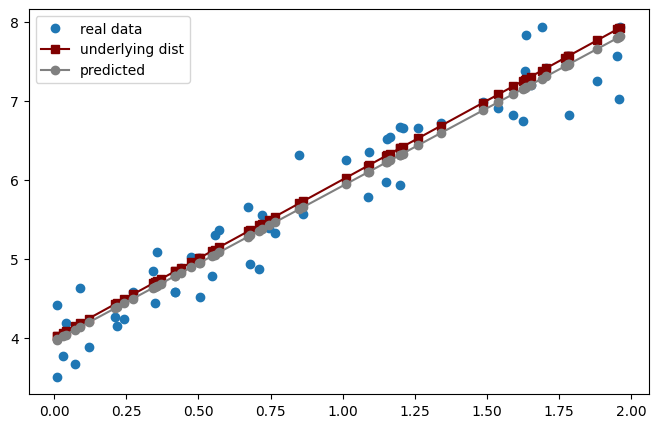

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(x[:, 1], y, 'o', label='real data')
plt.plot(x[:, 1], y_perfect, 's-', color = 'maroon', label='underlying dist')
plt.plot(x[:, 1], y_predict, 'o-', color = 'grey', label='predicted')
plt.legend()
plt.show()

In [12]:
# root mean square error
print('RMSE for y_perfect: ', np.sqrt(mean_squared_error(y_perfect, y)))
print('RMSE for y_predict: ', np.sqrt(mean_squared_error(y_predict, y)))

RMSE for y_perfect:  0.33393562173119873
RMSE for y_predict:  0.3243093881483335


*Linear Regression - Gradient Descent*

Gradient descent uses the equations for gradient to find the direction in which we adjust the parameter values $w$ and $b$ to minimize the loss function:

$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

$w_{j+1}=w_j-\alpha \times \frac{{\partial J}}{\partial w}$, where the term $\alpha$ is defined as the learning rate.



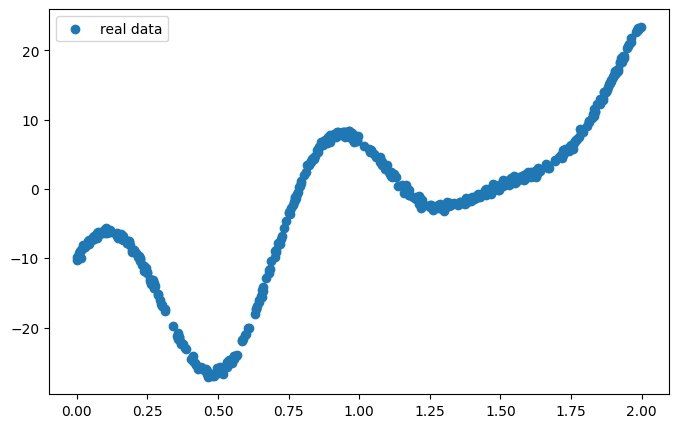

In [13]:
torch.manual_seed(20)
n = 500
true_weights = torch.tensor([-20.0, 17.0, 5.0, 10.0])  # true weights
r = 2  # range of data

x = r * torch.rand(n, 1)
t = (true_weights[0] + true_weights[1] * x + true_weights[2] * torch.sin(math.pi * x * 3) +
     true_weights[3] * torch.cos(math.pi * x * 2) + 0.3 * torch.randn(n, 1))

plt.figure(figsize=(8, 5))
plt.scatter(x,t, label='real data')
plt.legend()
plt.show()

In [14]:
print(x[0:10])
X = torch.cat((torch.ones_like(x), x, torch.sin(math.pi * x * 3), torch.cos(math.pi * x * 2)), dim=1) # design matrix
print('\n',X[0:10])

tensor([[1.1230],
        [0.3548],
        [1.6294],
        [0.6591],
        [0.4637],
        [1.5663],
        [1.7088],
        [0.2023],
        [0.3755],
        [1.8620]])

 tensor([[ 1.0000,  1.1230, -0.9164,  0.7161],
        [ 1.0000,  0.3548, -0.2009, -0.6119],
        [ 1.0000,  1.6294,  0.3438, -0.6872],
        [ 1.0000,  0.6591, -0.0714, -0.5407],
        [ 1.0000,  0.4637, -0.9422, -0.9741],
        [ 1.0000,  1.5663,  0.8110, -0.9145],
        [ 1.0000,  1.7088, -0.3866, -0.2561],
        [ 1.0000,  0.2023,  0.9441,  0.2951],
        [ 1.0000,  0.3755, -0.3867, -0.7092],
        [ 1.0000,  1.8620, -0.9636,  0.6472]])


Batch Gradient Descent computes the gradient of the cost function using the entire training dataset for each iteration. This approach ensures that the computed gradient is precise, but it can be computationally expensive when dealing with very large datasets.

initial w:  tensor([[0.6147],
        [0.3810],
        [0.6371],
        [0.4745]], requires_grad=True)


loss after 500 epoch:  10.656974792480469


loss after 1000 epoch:  9.641241073608398


loss after 1500 epoch:  8.719344139099121


loss after 2000 epoch:  7.870203018188477


loss after 2500 epoch:  7.07500696182251


loss after 3000 epoch:  6.31743049621582


loss after 3500 epoch:  5.584466934204102


loss after 4000 epoch:  4.866665363311768


loss after 4500 epoch:  4.157798767089844


loss after 5000 epoch:  3.4543161392211914


loss after 5500 epoch:  2.7549540996551514


loss after 6000 epoch:  2.060845375061035


loss after 6500 epoch:  1.3783013820648193


loss after 7000 epoch:  0.737338662147522


loss after 7500 epoch:  0.3377557098865509


loss after 8000 epoch:  0.3027995824813843


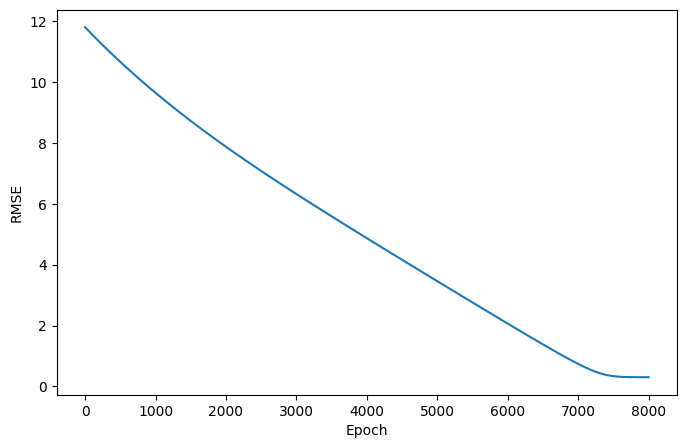

X shape: torch.Size([500, 4])
w shape: torch.Size([4, 1])
y shape: torch.Size([500, 1])
t shape: torch.Size([500, 1])
final weights:  tensor([[-19.9176],
        [ 16.9296],
        [  4.9845],
        [  9.9953]], requires_grad=True)
first sample:  tensor([ 1.0000,  1.1230, -0.9164,  0.7161])
target output for the first sample:  tensor([2.2066])
predicted output for the first sample:  tensor([1.6836], grad_fn=<SelectBackward0>)


In [15]:
torch.manual_seed(2)
w = torch.rand((4, 1), requires_grad=True)
print("initial w: ",w)

# hyperparameters
lr = 0.01
num_epochs = 8000
rmse_array = []
criterion = nn.MSELoss()

# training loop
for epoch in range(num_epochs+1):
    y = X @ w  # linear model prediction

    loss = torch.sqrt(criterion(y, t))  # RMSE loss
    loss.backward()  # compute gradients

    with torch.no_grad():
        w -= lr * w.grad  # update weights
        w.grad.zero_()  # zero gradients

    # print statement for every 500 epochs
    if ((epoch%500 == 0) & (epoch>0)):
      print("\n")
      print("loss after "+str(epoch)+" epoch: ", loss.item())
    rmse_array.append(loss.item())

# plot RMSE vs epochs
plt.figure(figsize=(8, 5))
plt.plot(rmse_array)
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

# print final values
print("X shape:", X.shape)
print("w shape:", w.shape)
print("y shape:", y.shape)
print("t shape:", t.shape)

print("final weights: ", w)
print("first sample: ",X[0])
print("target output for the first sample: ",t[0])
print("predicted output for the first sample: ",y[0])

In [16]:
true_weights

tensor([-20.,  17.,   5.,  10.])

Batch Gradient Descent is ideal when the dataset is small to medium-sized and when the error surface is smooth and convex. It is also preferred when you can afford the computational cost.

Stochastic Gradient Descent (SGD) addresses the inefficiencies of Batch Gradient Descent by computing the gradient using only a single training example (or a small subset) in each iteration. This makes the algorithm much faster since only a small fraction of the data is processed at each step.

initial w:  tensor([[0.6147],
        [0.3810],
        [0.6371],
        [0.4745]], requires_grad=True)


loss after 1 epoch:  8.53465657773614


loss after 2 epoch:  7.917984223157167


loss after 3 epoch:  7.394517685741186


loss after 4 epoch:  6.911960506498813


loss after 5 epoch:  6.449258003707975


loss after 6 epoch:  6.0020308273136616


loss after 7 epoch:  5.557827261146158


loss after 8 epoch:  5.1204517450332645


loss after 9 epoch:  4.6851320222616195


loss after 10 epoch:  4.253943348109722


loss after 11 epoch:  3.8218132553100586


loss after 12 epoch:  3.3922132765650748


loss after 13 epoch:  2.9607809675335885


loss after 14 epoch:  2.5298621846437452


loss after 15 epoch:  2.098729038208723


loss after 16 epoch:  1.6729206649959087


loss after 17 epoch:  1.2539641891419888


loss after 18 epoch:  0.8481301772147417


loss after 19 epoch:  0.4800240266472101


loss after 20 epoch:  0.2792201551795006


loss after 21 epoch:  0.25138550575077534


loss af

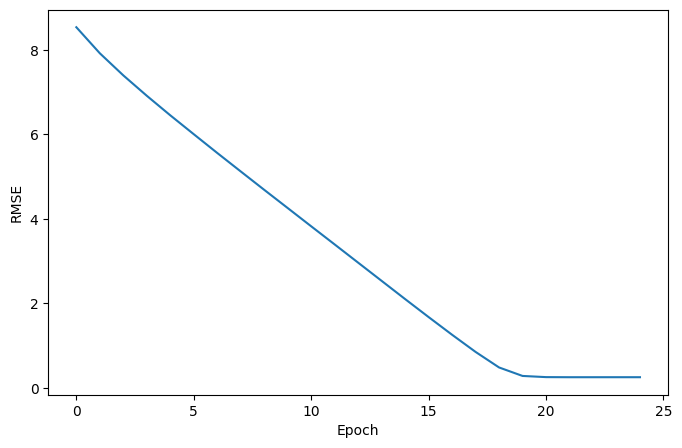

X shape: torch.Size([500, 4])
w shape: torch.Size([4, 1])
y shape: torch.Size([500])
t shape: torch.Size([500, 1])
final weights:  tensor([[-19.9257],
        [ 16.8914],
        [  4.9859],
        [ 10.0013]], requires_grad=True)
first sample:  tensor([ 1.0000,  1.1230, -0.9164,  0.7161])
target output for the first sample:  tensor([2.2066])
predicted output for the first sample:  tensor(1.6513)


In [17]:
# initialize weights
torch.manual_seed(2)
w = torch.rand((4, 1), requires_grad=True)
print("initial w: ",w)

# hyperparameters
lr = 0.01
num_epochs = 25
rmse_array = []
criterion = nn.MSELoss()
y_predict = torch.zeros(n)

# training loop
for epoch in range(num_epochs):
  total_loss = 0
  # print("loss for every datapoint")
  for i in range(len(X)):
    x, target = X[i], t[i]
    y = x @ w  # linear model prediction
    y_predict[i] = y.item()

    loss_tensor = torch.sqrt(criterion(y, target))
    loss_tensor.backward() #compute gradients
    loss_value = loss_tensor.item()
    # print(loss_value)

    with torch.no_grad():
      w -= w.grad * lr # update weights
      w.grad.zero_() # zero gradients

    total_loss += loss_value

  avg_loss = total_loss / len(X)
  rmse_array.append(avg_loss)
  print("\n")
  print("loss after "+str(epoch+1)+" epoch: ", avg_loss)

# Plot RMSE vs epochs
plt.figure(figsize=(8, 5))
plt.plot(rmse_array)
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

# Print final values
print("X shape:", X.shape)
print("w shape:", w.shape)
print("y shape:", y_predict.shape)
print("t shape:", t.shape)

print("final weights: ", w)
print("first sample: ",X[0])
print("target output for the first sample: ",t[0])
print("predicted output for the first sample: ",y_predict[0])

SGD is particularly useful when dealing with large datasets, where processing the entire dataset at once is computationally expensive. It is also effective when optimizing non-convex loss functions

### Logistic Regression

Logistic Regression is a widely used statistical method for binary classification problems, where the outcome is a categorical variable with two possible outcomes, such as 0 and 1, true and false, or yes and no. Unlike linear regression, which predicts continuous values, logistic regression estimates the probability that a given input belongs to a particular class.

In logistic regression, prediction is based on a linear combination of input features passed through a logistic function, also known as the sigmoid function:

$h_{\theta}(x) = \sigma(\theta ^T x) = \frac{1}{1+e^{-\theta^T x}} $

where ${\theta^T}x$ is the dot product of the parameter vector ${\theta}$ and the feature vector $x$,

and $\sigma$ is the sigmoid function, which outputs a value between 0 and 1, representing the probability that the input belongs to the positive class.

In logistic regression, a linear combination of the input features is computed (similar to linear regression): $\theta ^T x = \theta_0 + \theta_1 x_1+ \theta_2 x_2 + ... + \theta_n x_n$

Then, using the sigmoid function, the linear combination is transformed into a probability: $\sigma(\theta ^T x) = \frac{1}{1+e^{-\theta^T x}} $


The goal is to find the parameters $\theta$ that maximize the likelihood of the observed data. To simplify optimization, we minimize the negative log-likelihood, which is the cost function for logistic regression:

$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^i log(h_\theta (x^i))+ (1-y^i)log(1-h_\theta (x^i))]$

Where $y^i$ is the actual label for the $i$th observation,
 and $h_\theta (x^i)$ is the predicted probability that the $i$th observation belongs to the positive class.





In [18]:
x_part1 # part1 existing data

array([0.00943771, 0.01137701, 0.03050994, 0.04087826, 0.07295211,
       0.08972456, 0.11988398, 0.21029537, 0.21675378, 0.24313824,
       0.27341318, 0.34388203, 0.35082091, 0.35616198, 0.37065644,
       0.41840424, 0.42005316, 0.43939499, 0.47538842, 0.50139046,
       0.50485271, 0.54814749, 0.55673877, 0.57179138, 0.6722239 ,
       0.68038043, 0.70959122, 0.71901569, 0.74566409, 0.76388689,
       0.84903518, 0.86340837, 1.01086286, 1.08680988, 1.08936976,
       1.15018666, 1.153803  , 1.16368438, 1.19768675, 1.19771789,
       1.20760908, 1.26036787, 1.34149817, 1.48495938, 1.53823034,
       1.59132502, 1.6233663 , 1.6324495 , 1.63529876, 1.65170551,
       1.68955226, 1.70479018, 1.76970659, 1.78082313, 1.78109189,
       1.78264391, 1.88005964, 1.95001299, 1.95724757, 1.96184171])

In [19]:
# making the binary target based on the rule X > 1
y_Log = np.where(x_part1 > 1, 1, 0)
print(y_Log)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
# adding a column of ones to x to include the bias
X_new = np.hstack((np.ones((x_part1.shape[0], 1)), x_part1.reshape(-1, 1)))
print(X_new[:5])

Xtrain_Log, Xtest_Log, ytrain_Log, ytest_Log = train_test_split(X_new, y_Log, test_size=0.3, random_state=1) # splitting the dataset

[[1.         0.00943771]
 [1.         0.01137701]
 [1.         0.03050994]
 [1.         0.04087826]
 [1.         0.07295211]]


*Model Setup and Preliminary Predictions Before Training*

- Weight initialization: The model’s parameters (`theta_initial`) are initialized to zero.  
- Preliminary predictions: The linear combination, computed using the formula $\theta^T x$, is passed through the sigmoid function, producing probabilities of 0.5 due to the zero-initialized weights.  
- Binary classification: Probabilities are converted into binary predictions, resulting in all instances being classified as class 1.
- Initial performance assessment: The model’s predictions are displayed, and accuracy is evaluated, typically revealing poor or uninformative performance due to the lack of training.  

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
theta_init = np.zeros(Xtrain_Log.shape[1]) # initialize parameters to zero
z_init = np.dot(Xtrain_Log, theta_init) # initial linear combination (theta^T x)
yprob_init = sigmoid(z_init) #apply sigmoid function to get the initial predictions
ypredict_init = (yprob_init >= 0.5).astype(int) # convert probabilities to binary predictions

print("Preliminary predictions (before training):")
print(ypredict_init)

init_accuracy = accuracy_score(ytrain_Log, ypredict_init) # initial performance assessment
print(f'Preliminary accuracy (before training): {init_accuracy * 100:.2f}%')

Preliminary predictions (before training):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
Preliminary accuracy (before training): 40.48%


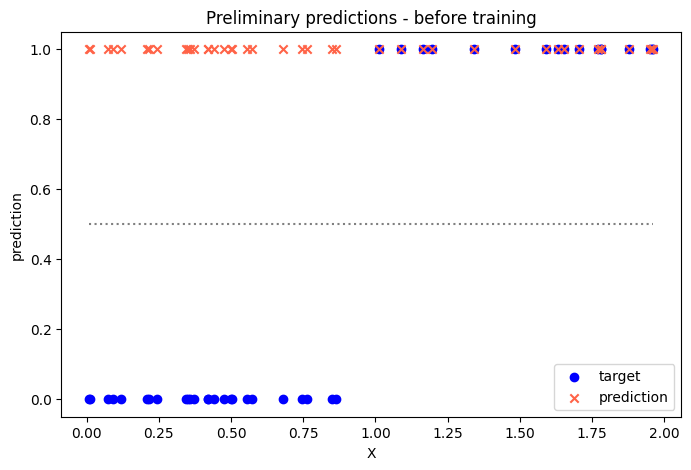

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(Xtrain_Log[:, 1], ytrain_Log, marker='o', c='blue', label='target')
plt.scatter(Xtrain_Log[:, 1], ypredict_init, marker='x', c='tomato', label='prediction')

# initial decision boundary
x_values = np.linspace(Xtrain_Log[:, 1].min(), Xtrain_Log[:, 1].max(), 50)
x_values_new = np.hstack((np.ones((x_values.shape[0], 1)), x_values.reshape(-1, 1)))
y_values = sigmoid(np.dot(x_values_new, theta_init))
plt.plot(x_values, y_values, color='grey', linestyle=':')
plt.xlabel('X')
plt.ylabel('prediction')
plt.legend()
plt.title('Preliminary predictions - before training')
plt.show()

The line at 0.5 indicates that the model does not differentiate between any inputs at this stage. It’s essentially "undecided," treating all inputs as equally likely to belong to either class.

*Gradient Descent - Logistic Regression*

Unlike linear regression, logistic regression does not have a closed-form direct solution due to the non-linearity introduced by the sigmoid function. Therefore, instead of directly solving for $\theta$, we use iterative optimization algorithms like gradient descent to find the parameters that minimize the cost function. It's also an approximation afterall.

However, if we were to find a direct solution similar to linear regression, it would involve using the gradient of the cost function to cmpute the gradient, and update the parameters using gradient descent:  $\theta_j := \theta_j - \alpha \frac{{\partial J}(\theta)}{\partial \theta_j}$ where $\alpha$ is the learning rate.

By iterating this process over multiple epochs, the algorithm gradually adjusts the parameters $\theta$ to minimize the cost function, converging to the optimal solution.

cost after 0 epoch:  0.6931270956993103
cost after 100 epoch:  0.4201250672340393
cost after 200 epoch:  0.3076917231082916
cost after 300 epoch:  0.2487950325012207
cost after 400 epoch:  0.21283921599388123
cost after 500 epoch:  0.1885475367307663
cost after 600 epoch:  0.1709519326686859
cost after 700 epoch:  0.15755103528499603
cost after 800 epoch:  0.1469542533159256
cost after 900 epoch:  0.13832803070545197
cost after 1000 epoch:  0.13114212453365326


Predictions after training: [[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
test accuracy - after training: 100.00%


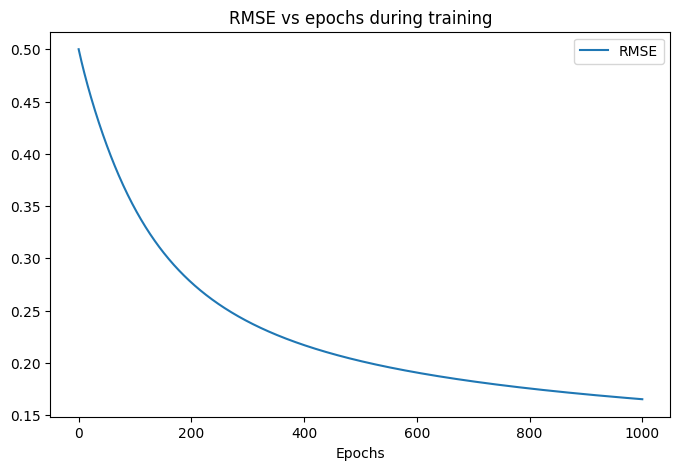

In [24]:
# import torch
# import torch.nn.functional as F
# from sklearn.metrics import accuracy_score, mean_squared_error

def sigmoid(x):
    return torch.sigmoid(x)

def compute_cost(X, y, theta):
    m = y.shape[0]
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = -(1/m) * torch.sum(y * torch.log(h + epsilon) + (1 - y) * torch.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, learning_rate, num_epochs):
    cost_history = []
    rmse_history = []
    m = y.shape[0]
    criterion = nn.MSELoss()

    for epoch in range(num_epochs+1):
        h = sigmoid(X @ theta)
        loss = compute_cost(X, y, theta)

        loss.backward()  # compute gradients

        with torch.no_grad():
            theta -= learning_rate * theta.grad  # Update parameters
            theta.grad.zero_()  # Reset gradients

        cost_history.append(loss.item())

        rmse = torch.sqrt(criterion(y, h))
        rmse_history.append(rmse.item())

        if epoch % 100 == 0:
          print("cost after "+str(epoch)+" epoch: ", cost_history[-1])

    return theta, cost_history, rmse_history

# tensor format
if isinstance(Xtrain_Log, np.ndarray):
  Xtrain_Log = torch.tensor(Xtrain_Log, dtype=torch.float32)
if isinstance(ytrain_Log, np.ndarray):
  ytrain_Log = torch.tensor(ytrain_Log, dtype=torch.float32).view(-1, 1)
if isinstance(Xtest_Log, np.ndarray):
  Xtest_Log = torch.tensor(Xtest_Log, dtype=torch.float32)
if isinstance(ytest_Log, np.ndarray):
  ytest_Log = torch.tensor(ytest_Log, dtype=torch.float32)

# initialize theta
theta_init = torch.zeros((Xtrain_Log.shape[1], 1), dtype=torch.float32, requires_grad=True)

# training
learning_rate = 0.1
num_epochs = 1000
theta_final, cost_history, rmse_history = gradient_descent(Xtrain_Log, ytrain_Log, theta_init, learning_rate, num_epochs)

# final predictions after training
yprob_Log = sigmoid(Xtest_Log @ theta_final).detach().numpy()
ypredict_Log = (yprob_Log >= 0.5).astype(int)
print("\n")
print('Predictions after training:', ypredict_Log)

final_accuracy = accuracy_score(ytest_Log.numpy(), ypredict_Log)
print(f'test accuracy - after training: {final_accuracy * 100:.2f}%')

# plot RMSE vs epochs (just for comparison)
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs+1), rmse_history, label='RMSE')
plt.xlabel('Epochs')
plt.title('RMSE vs epochs during training')
plt.legend()
plt.show()

After training the predictions are more realistic and closer to the target label.

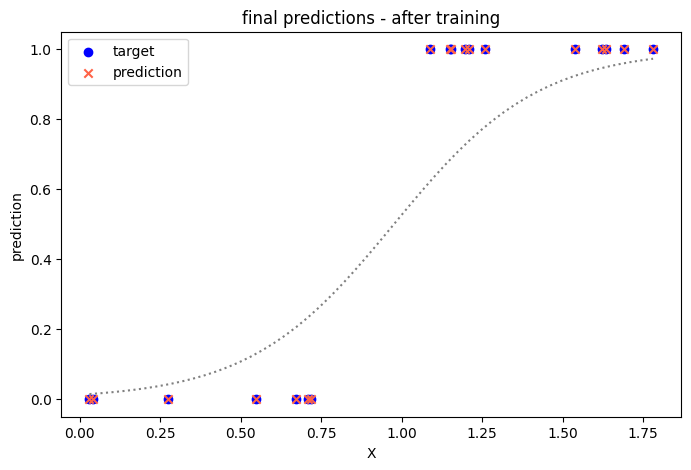

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(Xtest_Log[:, 1].numpy(), ytest_Log.numpy(), marker='o', c='blue', label='target')
plt.scatter(Xtest_Log[:, 1].numpy(), ypredict_Log, marker='x', c='tomato', label='prediction')

# final decision boundary
x_values = torch.linspace(Xtest_Log[:, 1].min(), Xtest_Log[:, 1].max(), 50)
x_values_new = torch.hstack((torch.ones((x_values.shape[0], 1)), x_values.view(-1, 1)))
y_values = sigmoid(x_values_new @ theta_final).detach().numpy()
plt.plot(x_values.numpy(), y_values, color='grey', linestyle=':')
plt.xlabel('X')
plt.ylabel('prediction')
plt.legend()
plt.title('final predictions - after training')
plt.show()

The line represents the decision boundary after the model has been trained. Unlike the initial flat boundary, this one is curved, reflecting the logistic function's shape (sigmoid curve). Inputs to the left of the boundary are predicted as class 0 (below the 0.5 threshold), and those to the right are predicted as class 1 (above the 0.5 threshold). This boundary demonstrates the model’s ability to classify inputs based on their probability of belonging to class 1.